In [1]:
!git clone https://github.com/codeforcauseorg/ML-Bootcamp-July

Cloning into 'ML-Bootcamp-July'...
remote: Enumerating objects: 222, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 222 (delta 12), reused 24 (delta 5), pack-reused 189
Receiving objects: 100% (222/222), 119.10 MiB | 24.06 MiB/s, done.
Resolving deltas: 100% (55/55), done.
Checking out files: 100% (131/131), done.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

In [3]:

rating = pd.read_csv('/content/ML-Bootcamp-July/datasets/recom/rating.csv')

In [4]:
rating.head() #collaborative recomendation model

,Unnamed: 0,user_id,anime_id,rating
0,2443027,23306,3503,7
1,4751250,45366,1190,-1
2,7694962,72305,5150,8
3,7066179,65975,6045,10
4,7198178,67151,3702,9


In [5]:
anime = pd.read_csv('/content/ML-Bootcamp-July/datasets/recom/anime.csv')

In [6]:
anime.head() #content based filter model

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


# Content Based Example

In [7]:
# We are taking only Drama genre to filter the movies and give recommendations
#def filtering(row):
#  if "Drama" in row[genre]:
    


In [8]:
items = np.array(anime.genre)

In [9]:
vals = [("Drama" in str(item)) for item in items]

In [10]:
anime.columns

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')

In [11]:
X = anime.loc[vals]


In [12]:
X

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351
7,820,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",OVA,110,9.11,80679
10,4181,Clannad: After Story,"Drama, Fantasy, Romance, Slice of Life, Supern...",TV,24,9.06,456749
...,...,...,...,...,...,...,...
12017,2218,Fujimi 2-choume Koukyougakudan,"Drama, Music, Psychological, Romance, Slice of...",OVA,1,5.72,4981
12071,3396,Gloria: Kindan no Ketsuzoku,"Drama, Hentai, Mystery, Romance",OVA,3,5.61,654
12143,4697,Chimera: Target I Datenshi Kourin,"Drama, Hentai",OVA,1,5.46,841
12203,730,Houkago no Shokuinshitsu,"Drama, Romance, Yaoi",OVA,2,5.23,4550


In [19]:
X_mod = X[['episodes', 'rating', 'members']]

In [14]:
X_mod.describe()

,rating,members
count,1977.000000,2016.000000
mean,6.977218,28900.097718
std,0.881088,71701.646529
min,3.330000,20.000000
25%,6.420000,443.750000
50%,7.020000,4079.000000
75%,7.560000,22722.500000
max,9.370000,896229.000000


In [15]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


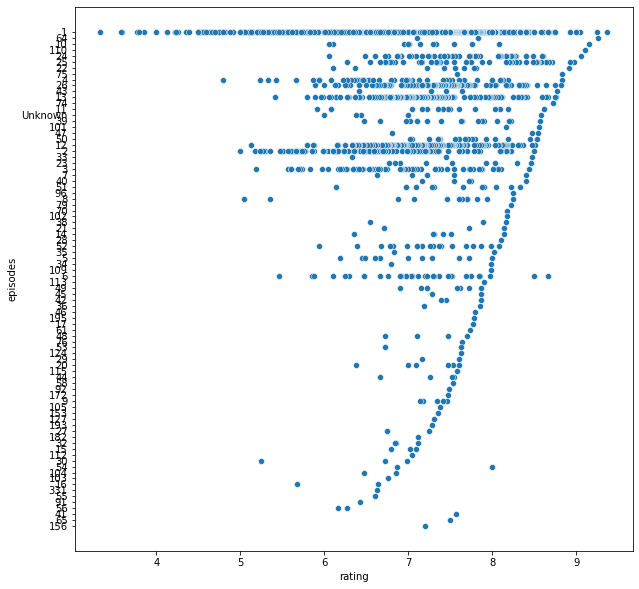

In [21]:
fig = plt.figure(figsize= (10, 10))
sns.scatterplot(X.rating, X.episodes)

# Collaborative System

In [23]:
len(rating) # If we want to create a 2D structure for this than there will a lot of things to fill up in the sparse matrix
# Not a feasible way of putting up these values

3906868